<a href="https://colab.research.google.com/github/old-tom-bombadil/factor-hack/blob/main/Copy_of_nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non linear regression / curve fitting

You'll find more information and detailed explainations on [my blog](https://lucidar.me/en/neural-networks/curve-fitting-nonlinear-regression/).

[Video of the expected result](https://youtu.be/7z86Lxzf_2o)


## Check/install TensorFlow version
**Must be version 2.1.0**


In [4]:
# Switch the TensorFlow version 2.1
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 26kB/s 
     |████████████████████████████████| 3.9MB 44.3MB/s 
     |████████████████████████████████| 450kB 32.3MB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f7c78d49d413728becea332ce65bd26a88e6c3e054f6666480d99bc99c1a37f9
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tens

## Import libraries and create noisy data



In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

p= 4759
q =5501
# semiprime with relatively small primes
N = p * q

print ('TensorFlow version: ' + tf.__version__)

# Create noisy data
#x_data = np.linspace(-10, 10, num=1000)
#y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
# for some mysterious reason the values of x_data dramatically affect the model even if the range and ydata remain the same0
x_data = np.linspace(-100, 100, num=200)
x_data = x_data +p
y_data = N % (  x_data )
print('Data created successfully')

TensorFlow version: 2.4.0
Data created successfully


In [24]:
y_data

array([ 338.        , 4010.77386935, 3026.55778895, 2044.35175879,
       1064.15577889,   85.96984925, 3774.8241206 , 2801.66331658,
       1830.51256282,  861.37185929, 4563.29145729, 3599.1758794 ,
       2637.07035176, 1676.97487437,  718.88944724, 4436.88944723,
       3483.82914573, 2532.77889447, 1583.73869347,  636.70854272,
       4370.78894472, 3428.7839196 , 2488.78894472, 1550.8040201 ,
        614.82914573, 4364.98994975, 3434.040201  , 2505.10050251,
       1578.17085427,  653.25125628, 4419.49246231, 3499.59798995,
       2581.71356784, 1665.83919598,  751.97487437, 4534.29648241,
       3625.45728643, 2718.6281407 , 1813.80904522,  911.        ,
         10.20100503, 3811.61809045, 2915.84422111, 2022.08040201,
       1130.32663316,  240.58291457, 4058.08040201, 3173.36180905,
       2290.65326633, 1409.95477387,  531.26633166, 4364.84422111,
       3491.18090452, 2619.52763819, 1749.88442211,  882.25125628,
         16.6281407 , 3869.30150754, 3008.70351759, 2150.11557

## Display curve to fit

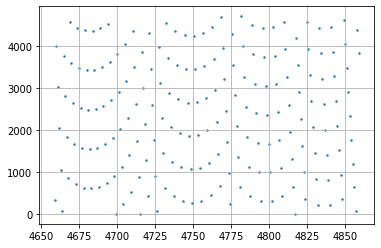

<Figure size 432x288 with 0 Axes>

In [25]:
# Display the dataset
plt.scatter(x_data[::1], y_data[::1], s=2)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

# Create the model
Create the model with two 64 units hidden layers.

In [26]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))

model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1024, activation = 'sigmoid'))
#model.add(keras.layers.Dense(units = 1024, activation = 'sigmoid'))


model.add(keras.layers.Dense(units = 1, activation = 'linear')) # not linear
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1025      
Total params: 71,875
Trainable params: 71,875
Non-trainable params: 0
_________________________________________________________________


In [27]:
x_data

array([4659.        , 4660.00502513, 4661.01005025, 4662.01507538,
       4663.0201005 , 4664.02512563, 4665.03015075, 4666.03517588,
       4667.04020101, 4668.04522613, 4669.05025126, 4670.05527638,
       4671.06030151, 4672.06532663, 4673.07035176, 4674.07537688,
       4675.08040201, 4676.08542714, 4677.09045226, 4678.09547739,
       4679.10050251, 4680.10552764, 4681.11055276, 4682.11557789,
       4683.12060302, 4684.12562814, 4685.13065327, 4686.13567839,
       4687.14070352, 4688.14572864, 4689.15075377, 4690.15577889,
       4691.16080402, 4692.16582915, 4693.17085427, 4694.1758794 ,
       4695.18090452, 4696.18592965, 4697.19095477, 4698.1959799 ,
       4699.20100503, 4700.20603015, 4701.21105528, 4702.2160804 ,
       4703.22110553, 4704.22613065, 4705.23115578, 4706.2361809 ,
       4707.24120603, 4708.24623116, 4709.25125628, 4710.25628141,
       4711.26130653, 4712.26633166, 4713.27135678, 4714.27638191,
       4715.28140704, 4716.28643216, 4717.29145729, 4718.29648

## Training over 100 epochs

In [28]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 7446282.3125
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 7084660.6250
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 7629156.9375
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 7376798.0625
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 7458180.2500
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 7452476.8125
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 7020486.3750
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 7695022.6250
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 7038585.5000
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 7293481.0000
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 7129000.1250
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 72

# Predict and display

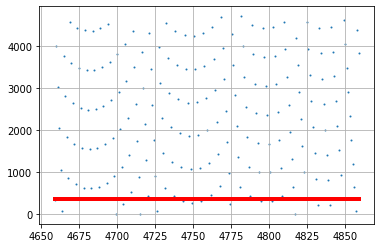

In [29]:
# Compute the output 

y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()
#plt.savefig('training.png', dpi=1200)
#files.download("training.png") 

In [30]:
y_predicted

array([[368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],
       [368.98956],


## Create image sequence for the video

Run this section to generate a sequence of images for the [video](https://www.youtube.com/watch?v=7z86Lxzf_2o).

To get the video from the beginning, you have to reset the model weight. Re-creating the model should reseting the weights.

Train on 1000 samples
1000/1000 [==============================] - 0s 63us/sample - loss: 0.0151
Train on 1000 samples
1000/1000 [==============================] - 0s 64us/sample - loss: 0.0165
Train on 1000 samples
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0170


KeyboardInterrupt: ignored

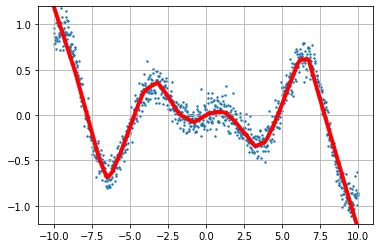

In [ ]:
for x in range(100):
  # One epoch
  model.fit( x_data, y_data, epochs=1, verbose=1)

  # Compute the output 
  y_predicted = model.predict(x_data)

  # Display the result
  plt.scatter(x_data[::1], y_data[::1], s=2)
  plt.plot(x_data, y_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)  
  #plt.show()
  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  files.download('training-' + str(x) +'-epochs.png') 
  plt.clf()

